**STEP 1 :
Business Problem Understanding

Dream housing company deals in all kinds of home loans. They have presense across all urban,semi urban and rural areas. Cutomer first applies for loan and after that company validates the customer eligibility for loan
                                                                                                                                                                                                    

Comapany wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender , Maritial Status,Education, Number of dependents, income, loan amount, credit history, and others. To automate this process they have provided a dataset to identify the customer segments that are eligible for loan amount so that they can specifically target customers.

In [1]:
# importing librararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the Dataset
data = pd.read_csv("Loan_Data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# lets check columns name
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

STEP 2 : Data Understanding

1. loan_ID : Unique loan ID
2. Gender : Male or female
3. married : Applicant married or not
4. Dependents : number of dependents
5. Eduaction : Applicants education
6. Self_employed : weathe rthe applicant is self employed or not
7. Apllicant_income : what is income of applicant
8. Coapplicant income : income of coapplicant
9. Loan Amount : loan amount in thousands
10. loan_amount_term : term of loan amount in months
11. property_type : weather property is in urban, rural area, semi urban area
12. loan_status : weather loan granted or notm

In [5]:
 data["Loan_ID"].nunique()

614

In [6]:
data.drop(columns = ["Loan_ID"],inplace =True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data["Gender"].nunique()

2

In [9]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
data["Married"].nunique()

2

In [11]:
data["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
data["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
data["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
data["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [18]:
data["ApplicantIncome"].nunique()

505

In [19]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
data["LoanAmount"].nunique()

203

In [21]:
data["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [22]:
data['Loan_Amount_Term'].nunique()

10

In [23]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [24]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [25]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [26]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [27]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [28]:
data['Property_Area'].nunique()

3

In [29]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [30]:
data['Credit_History']=data['Credit_History'].replace({1: "Good",0:"Bad"})

In [31]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
465,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,Good,Rural,Y
193,Male,No,0,Graduate,No,3858,0.0,76.0,360.0,Good,Semiurban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Good,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,Good,Rural,Y
525,Male,Yes,2,Graduate,Yes,17500,0.0,400.0,360.0,Good,Rural,Y
302,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,Good,Rural,Y
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,Bad,Urban,N
544,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban,Y
287,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,Good,Rural,Y
330,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,Good,Urban,Y


In [32]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
continous =['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_categorical = ['Gender', 'Married', 'Education', 'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
discrete_count = ['Dependents','Loan_Amount_Term']

EDA: EXPLORATORY DATA ANALYSIS

In [34]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<Axes: xlabel='LoanAmount', ylabel='Count'>

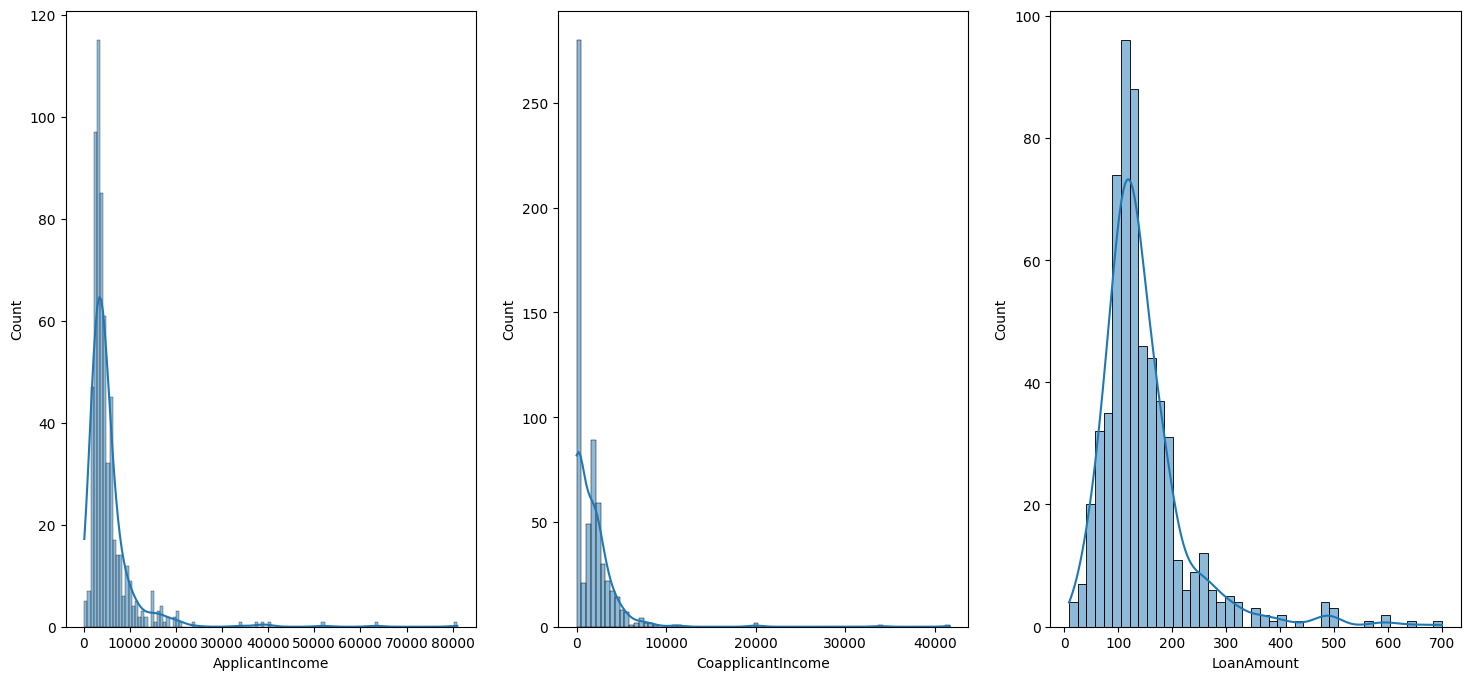

In [35]:
plt.rcParams["figure.figsize"] = (18,8)
plt.subplot(1,3,1)
sns.histplot(data["ApplicantIncome"],kde= True)

plt.subplot(1,3,2)
sns.histplot(data["CoapplicantIncome"],kde =True)

plt.subplot(1,3,3)
sns.histplot(data["LoanAmount"],kde =True)


In [36]:
!pip install pandas-profiling


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# creating the dataframe
# dictionary of data
dct = {'ID': {0: 23, 1: 43, 2: 12, 3: 13, 
			4: 67, 5: 89, 6: 90, 7: 56, 
			8: 34}, 
	'Name': {0: 'Ram', 1: 'Deep', 2: 'Yash',
				3: 'Aman', 4: 'Arjun', 5: 'Aditya',
				6: 'Divya', 7: 'Chalsea',
				8: 'Akash' }, 
	'Marks': {0: 89, 1: 97, 2: 45, 3: 78,
				4: 56, 5: 76, 6: 100, 7: 87,
				8: 81}, 
	'Grade': {0: 'B', 1: 'A', 2: 'F', 3: 'C',
				4: 'E', 5: 'C', 6: 'A', 7: 'B',
				8: 'B'}
	}

# forming dataframe and printing
data1 = pd.DataFrame(dct)
print(data)


     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [38]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

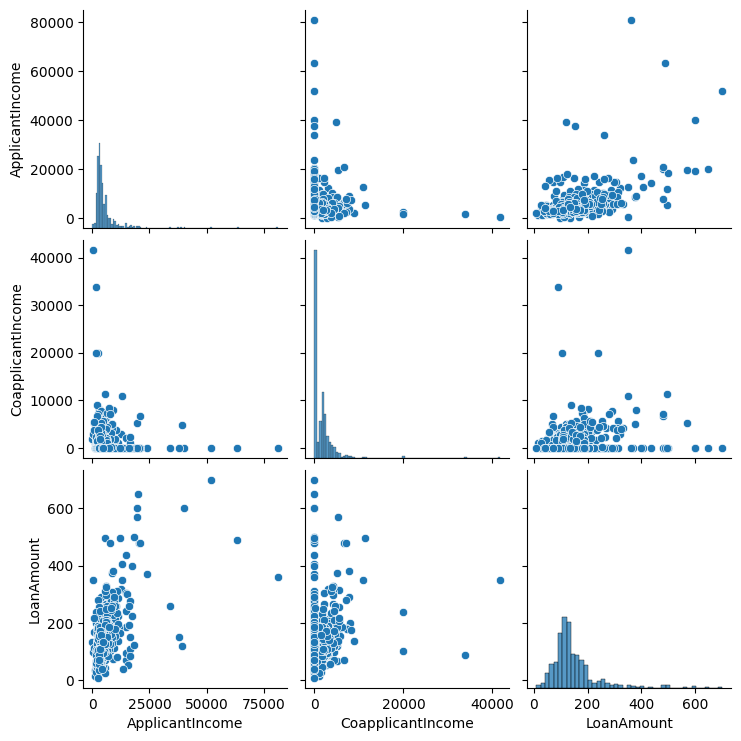

In [39]:
sns.pairplot(data[continous])

<Axes: >

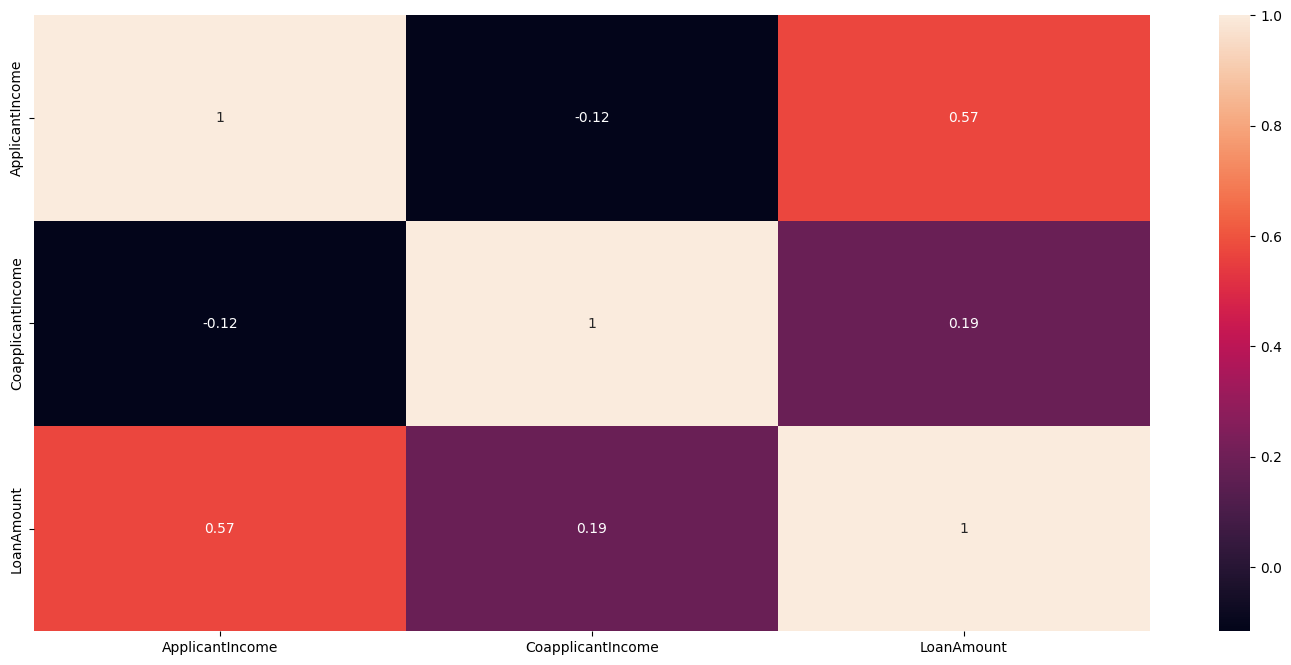

In [40]:
sns.heatmap(data[continous].corr(), annot =True)

In [41]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Good,Semiurban,Y
freq,489,398,480,500,475,233,422


<Axes: xlabel='count', ylabel='Loan_Status'>

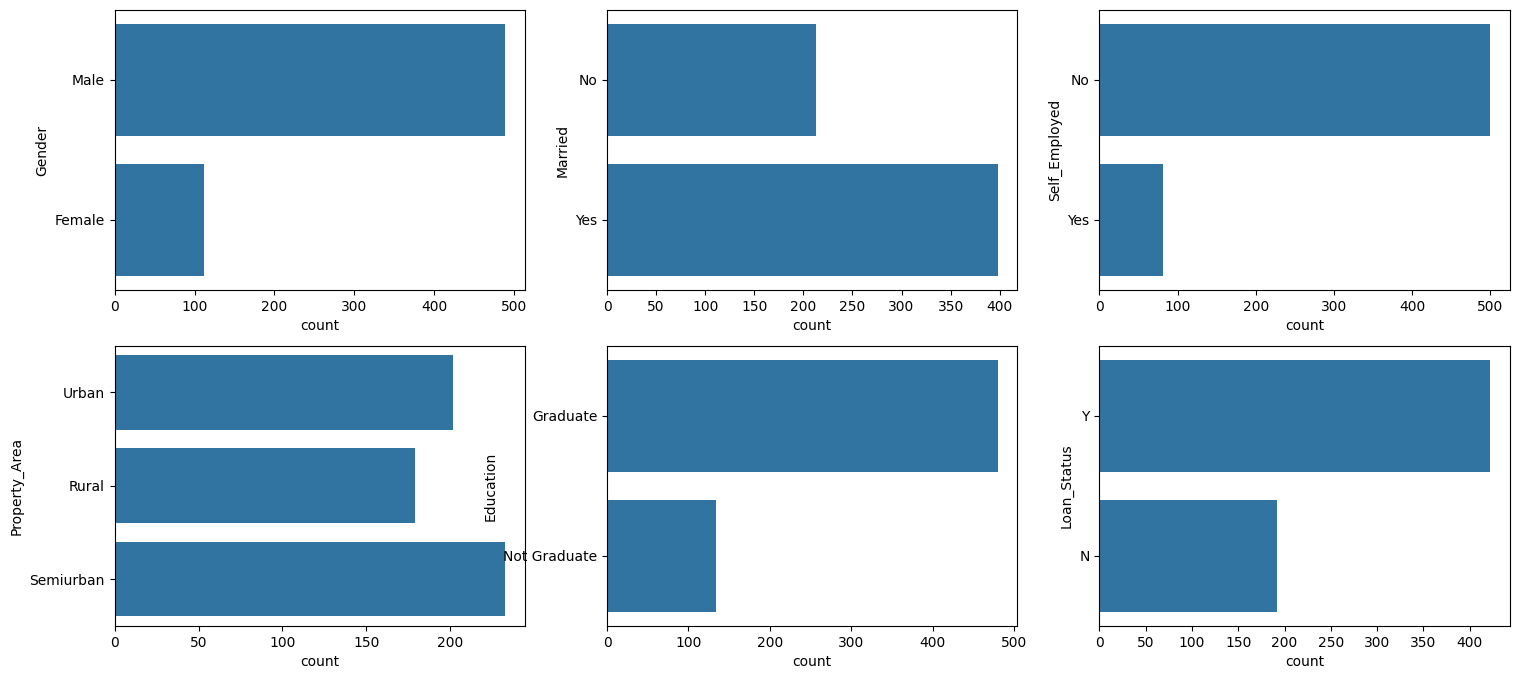

In [42]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(data["Gender"])

plt.subplot(2,3,2)
sns.countplot(data["Married"])


plt.subplot(2,3,3)
sns.countplot(data["Self_Employed"])

plt.subplot(2,3,4)
sns.countplot(data["Property_Area"])


plt.subplot(2,3,5)
sns.countplot(data["Education"])



plt.subplot(2,3,6)
sns.countplot(data["Loan_Status"])


DATA PREPARATION

In [43]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
286,Female,No,0,Graduate,Yes,2600,1717.0,99.0,300.0,Good,Semiurban,N
562,Male,Yes,0,Graduate,No,5923,2054.0,211.0,360.0,Good,Rural,Y
598,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,Good,Rural,Y
422,Male,Yes,0,Graduate,No,1820,1719.0,100.0,360.0,Good,Urban,Y
590,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,Good,Semiurban,Y
439,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,Good,Rural,Y
13,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,Good,Rural,N
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,Good,Rural,N
583,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N
285,Male,No,0,Graduate,No,3158,3053.0,89.0,360.0,Good,Rural,Y


In [44]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: ylabel='LoanAmount'>

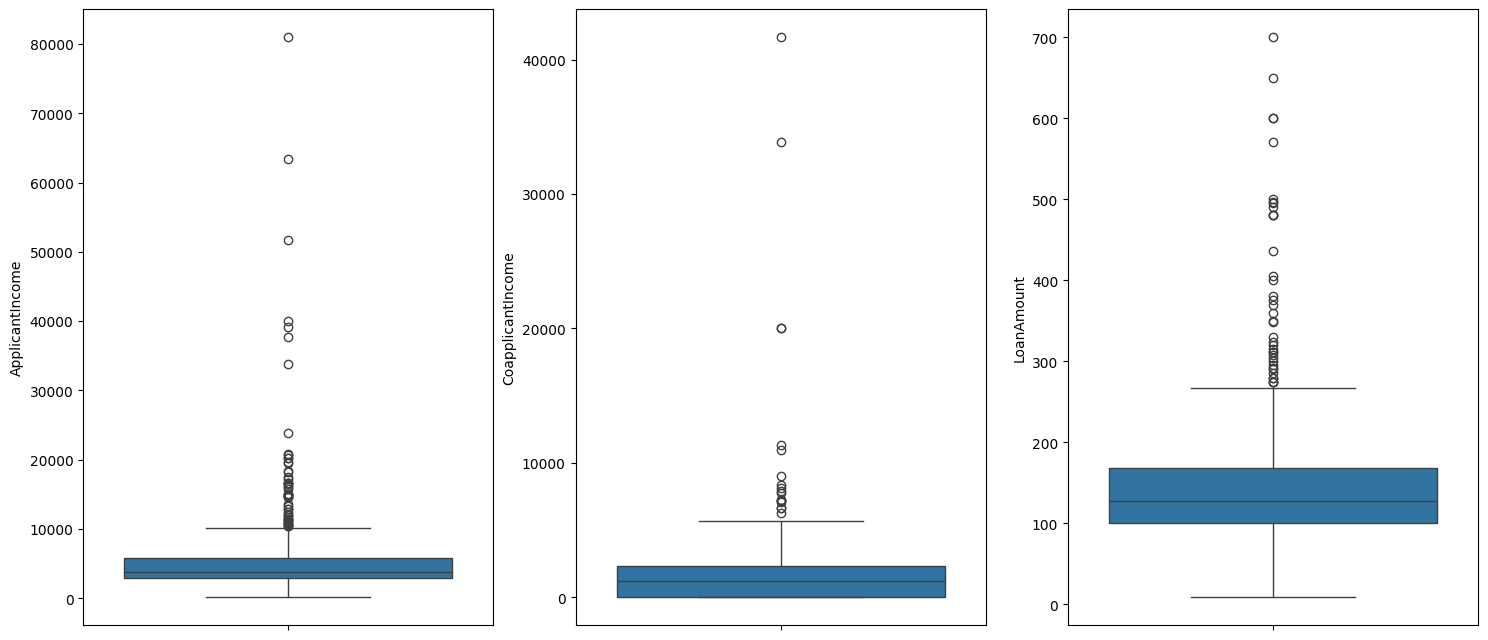

In [48]:
# outliers visualisation using boxplot

plt.subplot(1,3,1)
sns.boxplot(data["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(data["CoapplicantIncome"])

plt.subplot(1,3,3)
sns.boxplot(data["LoanAmount"])



In [51]:
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.drop(columns= ["ApplicantIncome","CoapplicantIncome"], inplace = True)

KeyError: 'ApplicantIncome'